In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Loading / Cleaning a Trace

In [179]:
traces_folder = 'logging/batch-06-26_06:51:05'
trace = '0-0-raw'

In [134]:
!cat $traces_folder/$trace

1466923874.605523 OUTGOING CIRC 2486238030, STREAM 0, COMMAND EXTEND2(14), length 119

1466923875.098152 INCOMING CIRC 2486238030, STREAM 0, COMMAND EXTENDED2(15), length 66

1466923875.099200 OUTGOING CIRC 2486238030, STREAM 26450, COMMAND BEGIN_DIR(13), length 0

1466923875.100198 OUTGOING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 90

1466923875.538973 INCOMING CIRC 2486238030, STREAM 26450, COMMAND CONNECTED(4), length 0

1466923875.685539 INCOMING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 498

1466923875.794120 INCOMING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 498

1466923875.795662 INCOMING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 498

1466923875.796608 INCOMING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 498

1466923875.797640 INCOMING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 498

1466923875.798476 INCOMING CIRC 2486238030, STREAM 26450, COMMAND DATA(2), length 498

1466923875.799179 INCOMING CIRC 2486

In [135]:
def clean_trace(trace):
    df = pd.read_csv(trace, delimiter=' ', header=None)
    
    # Meaningful column names
    df.columns = ['Timestamp', 'Direction', 'dummy1', 'Circuit', 
                  'dummy2', 'Stream', 'dummy3', 'Command',
                  'dummy4', 'Length']

    # Drop unnecessary columns
    df.drop(['dummy1', 'dummy2', 'dummy3', 'dummy4'], axis=1, inplace=True)

    # Dump trash commas and fix data types
    df['Circuit'] = df['Circuit'].apply(lambda x: x.rstrip(',')).astype('int')
    df['Stream'] = df['Stream'].apply(lambda x: x.rstrip(',')).astype('int')
    df['Command'] = df['Command'].apply(lambda x: x.rstrip(','))
    return df

# Descriptive Statistics on a few traces

In [180]:
df_00raw = clean_trace('{}/{}'.format(traces_folder, '0-0-raw'))

In [175]:
def pretty_plot():
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    # Remove grid lines
    ax.grid(False)
    # Remove plot frame
    ax.set_frame_on(False)
    return ax


def generate_basic_plots(df):
    df['Direction'].value_counts().plot(kind='bar', ax=pretty_plot(), title='Cell directions')
    df['Circuit'].value_counts().plot(kind='barh', ax=pretty_plot(), title='Cells per Circuit')
    df['Stream'].value_counts().plot(kind='barh', ax=pretty_plot(), title='Cells per Stream')

    
def generate_basic_tables(df):
    print('[***] Most frequent lengths by count')
    print(df['Length'].value_counts())
    command_group = df.groupby(['Command', 'Length'])
    print('[***] Group length by command')
    print(command_group.count())

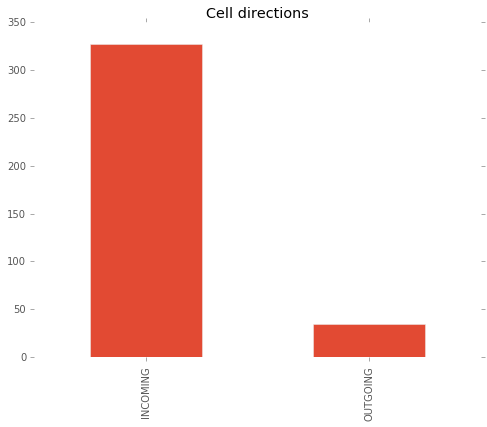

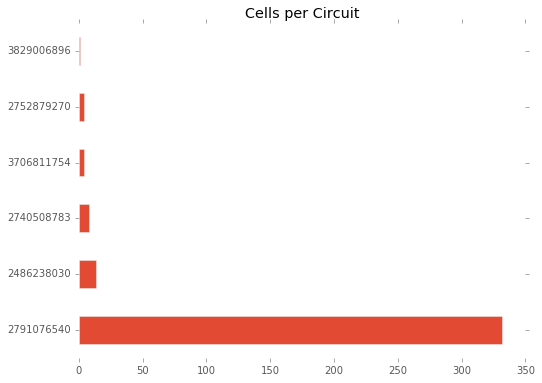

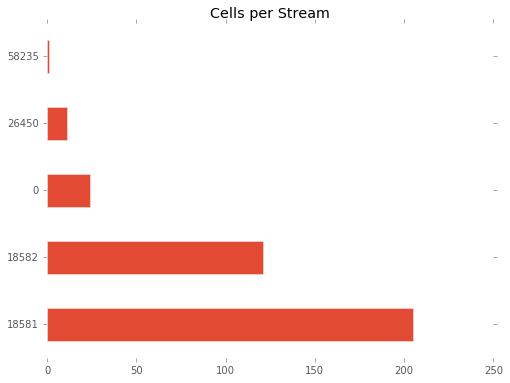

In [176]:
generate_basic_plots(df_00raw)

In [177]:
generate_basic_tables(df_00raw)

[***] Most frequent lengths by count
498    293
0       14
119      7
66       7
448      6
1        4
177      3
329      2
324      2
317      2
4        2
492      2
148      2
96       1
29       1
38       1
3        1
90       1
20       1
450      1
158      1
218      1
273      1
289      1
306      1
400      1
408      1
409      1
212      1
Name: Length, dtype: int64
[***] Group length by command
                                   Timestamp  Direction  Circuit  Stream
Command                    Length                                       
BEGIN(1)                   4               2          2        2       2
BEGIN_DIR(13)              0               1          1        1       1
CONNECTED(4)               0               3          3        3       3
DATA(2)                    3               1          1        1       1
                           29              1          1        1       1
                           38              1          1        1       1
   

Mapping between command and length not one to one. O SNAP

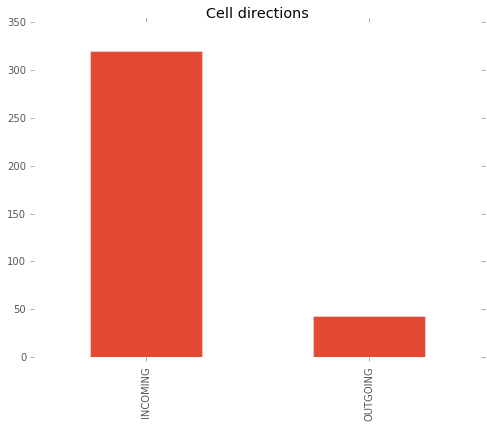

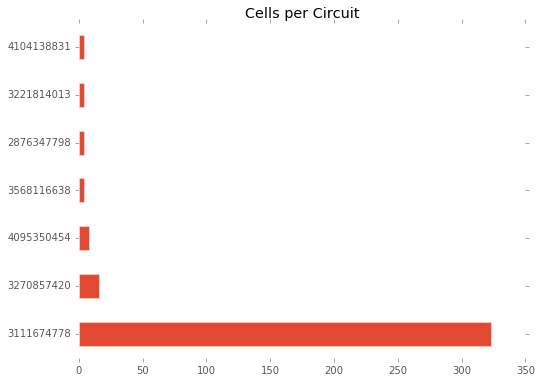

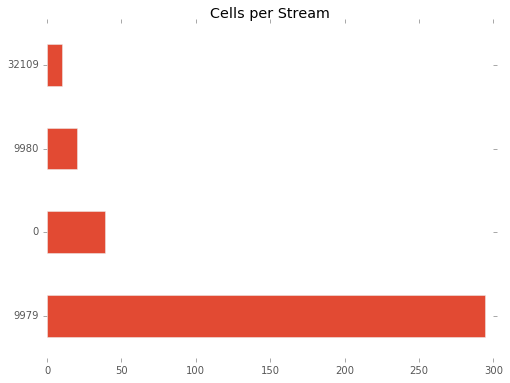

In [182]:
df_77raw = clean_trace('{}/{}'.format(traces_folder, '77-raw'))
generate_basic_plots(df_77raw)

In [183]:
generate_basic_tables(df_77raw)

[***] Most frequent lengths by count
498    289
119     15
66      15
0       13
448      7
4        2
148      2
437      1
170      1
1        1
20       1
51       1
460      1
89       1
111      1
212      1
400      1
251      1
462      1
290      1
300      1
305      1
315      1
345      1
351      1
393      1
289      1
Name: Length, dtype: int64
[***] Group length by command
                                   Timestamp  Direction  Circuit  Stream
Command                    Length                                       
BEGIN(1)                   4               2          2        2       2
BEGIN_DIR(13)              0               1          1        1       1
CONNECTED(4)               0               3          3        3       3
DATA(2)                    51              1          1        1       1
                           89              1          1        1       1
                           111             1          1        1       1
                         

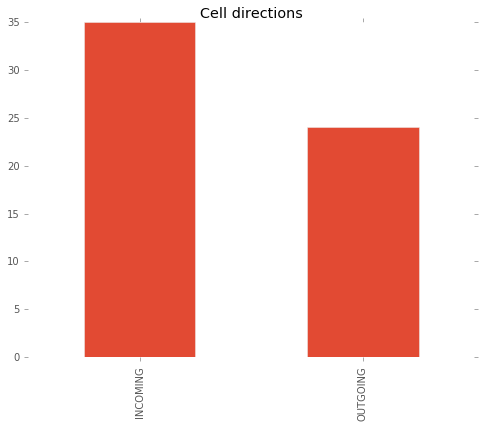

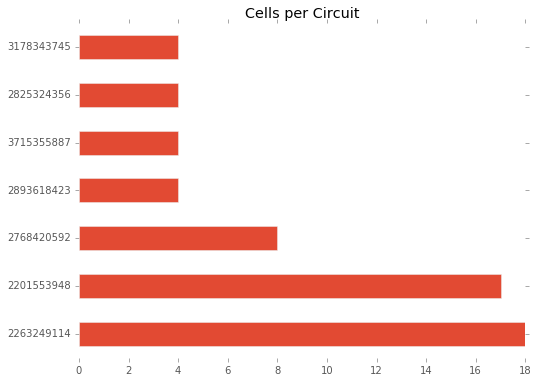

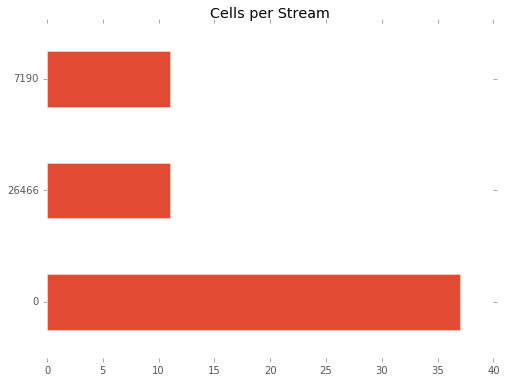

In [185]:
df_99raw = clean_trace('{}/{}'.format(traces_folder, '99-raw'))
generate_basic_plots(df_99raw)

In [186]:
generate_basic_tables(df_99raw)

[***] Most frequent lengths by count
66     15
119    15
498     9
0       5
324     2
148     2
449     1
4       1
1       1
20      1
270     1
212     1
281     1
90      1
289     1
300     1
400     1
Name: Length, dtype: int64
[***] Group length by command
                                   Timestamp  Direction  Circuit  Stream
Command                    Length                                       
BEGIN(1)                   4               1          1        1       1
BEGIN_DIR(13)              0               1          1        1       1
CONNECTED(4)               0               2          2        2       2
DATA(2)                    90              1          1        1       1
                           270             1          1        1       1
                           281             1          1        1       1
                           289             1          1        1       1
                           300             1          1        1       1
      